In [ ]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

飛機


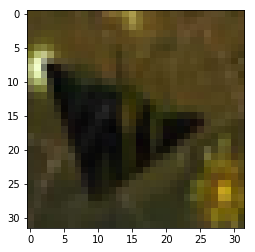

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

c = random.randint(0, 49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [6]:
x_train_shape = x_train/ 255
x_test_shape = x_test / 255
# y進去的時候要 one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense
from keras.layers import Flatten

# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3),
               activation="relu",
               padding="same",
               input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
# 9(格子) * 32(上一層特徵數) * 64(filters) + 64(bias)
cnn.add(Conv2D(64, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPool2D(pool_size=(2,2)))
# MLP開始
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [11]:
cnn.compile(loss="categorical_crossentropy", 
            optimizer="adam",
           metrics=["accuracy"])

In [12]:
cnn.fit(x_train_shape, y_train_cat, 
        batch_size=200, epochs=10, 
        validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 71s 2ms/step - loss: 1.6090 - acc: 0.4169 - val_loss: 1.3025 - val_acc: 0.5274
Epoch 2/10
45000/45000 [==============================] - 72s 2ms/step - loss: 1.2077 - acc: 0.5741 - val_loss: 1.0818 - val_acc: 0.6194
Epoch 3/10
45000/45000 [==============================] - 76s 2ms/step - loss: 1.0205 - acc: 0.6409 - val_loss: 0.9627 - val_acc: 0.6670
Epoch 4/10
45000/45000 [==============================] - 77s 2ms/step - loss: 0.9037 - acc: 0.6836 - val_loss: 0.8885 - val_acc: 0.6922
Epoch 5/10
45000/45000 [==============================] - 77s 2ms/step - loss: 0.8152 - acc: 0.7152 - val_loss: 0.8487 - val_acc: 0.7084
Epoch 6/10
45000/45000 [==============================] - 77s 2ms/step - loss: 0.7394 - acc: 0.7420 - val_loss: 0.8118 - val_acc: 0.7224
Epoch 7/10
45000/45000 [==============================] - 76s 2ms/step - loss: 0.6751 - acc: 0.7633 - val_loss: 0.7841 - val_acc:

In [13]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 6s 614us/step


[0.7978894422531128, 0.7384]

In [14]:
cnn.save("simplecnn.h5")

In [15]:
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 6s 615us/step


[0.7978894422531128, 0.7384]

In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))


,0,1,2,3,4,5,6,7,8,9
0,794,11,32,19,11,9,5,15,68,36
1,19,863,5,10,1,2,5,3,13,79
2,71,9,640,69,52,48,39,47,14,11
3,26,10,70,621,49,111,37,42,19,15
4,22,6,82,79,634,28,28,105,12,4
5,19,4,47,211,31,596,15,58,13,6
6,8,7,47,94,31,33,750,15,8,7
7,11,7,29,36,36,34,2,830,5,10
8,53,29,7,14,2,5,2,6,856,26
9,31,81,5,17,4,7,5,15,35,800
